## Part 3 - Rural vs Urban Cellular Connectivity Analysis

### Bridging The Digital & Cellular Divide Between Urban And Rural Pennsylvania

Expanding rural broadband and cellular connectivity in Pennsylvania is an urgent necessity, highlighted by the current digital divide affecting over 330,000 households - mainly in rural areas. The lack of reliable internet and cellular access is seen as a significant setback, impacting education, telework, and access to vital information, especially during crises. Despite the recent allocation of $1.5 billion through federal acts, challenges such as a skilled workforce shortage and bureaucratic roadblocks pose obstacles. Our first step involves depicting rural and urban counties in Pennsylvania based on population density, aimed at providing a base for comprehending the digital divide. The Center For Rural Pennsylvania defines rural areas as those with fewer than 291 people per square mile. Pennsylvania comprises 48 rural counties and 19 urban counties according to this classification. This visualization, coupled with a second map, serves to highlight the imperative for collaborative efforts between the government and the private sector - prioritizing comprehensive connectivity, treating it with the urgency as critical infrastructure development.

In [1]:
import warnings
warnings.filterwarnings("ignore")
#warnings.filterwarnings("default")
import logging
logging.getLogger('numba.core.byteflow').setLevel(logging.WARNING)
logging.getLogger("fsspec").setLevel(logging.WARNING)

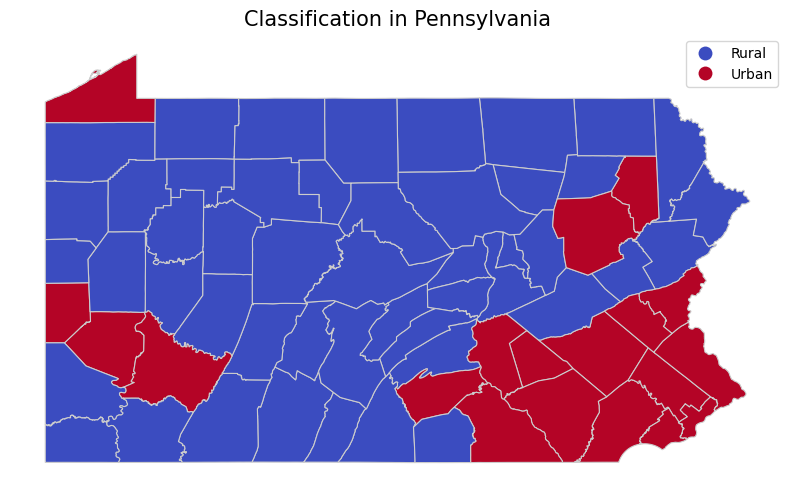

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# The Center for Rural Pennsylvania's definition of rural and urban is based on population density. 
# Population density is calculated by dividing the total population of a specific area by the total number of square land miles of that area.

# Load the shapefile
shapefile_path = './Data/PABoundaries_PY.shp'
gdf = gpd.read_file(shapefile_path)

# Load the CSV file
csv_path = './Data/RuralUrban_PY.csv'
csv_data = pd.read_csv(csv_path)

# Merge the shapefile and CSV data on the "Name" column
merged_data = gdf.merge(csv_data, on='Name')

# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='Municipal', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the map
ax.set_title('Classification in Pennsylvania', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((1, 1))

# Show the map
plt.show()

### Connecting the Dots: Analyzing Cellular Tower Distributions in Pennsylvania

Pennsylvania’s radio and cellular tower distributions show a noticeable spatial contrast between rural and urban areas, as well as along transportation corridors. In urban settings, the landscape is characterized by a dense network of towers strategically positioned to provide comprehensive coverage and support the high demand for connectivity. These towers often cluster in areas with concentrated populations, ensuring that urban dwellers enjoy access to telecommunications services. In contrast, rural areas present a different challenge, where the vast and less populated expanses require a more spaced-out distribution of towers to cover larger geographic areas. Transportation corridors, such as highways and major roads, play a crucial role in tower placement, serving as aids for connectivity and demanding an increased concentration of infrastructure to provide to the mobile communication needs of travelers. The dynamic exchange between rural and urban demands, coupled with the strategic placement along transportation corridors, highlights the balance required to optimize radio and cellular tower distributions across the state of Pennsylvania.

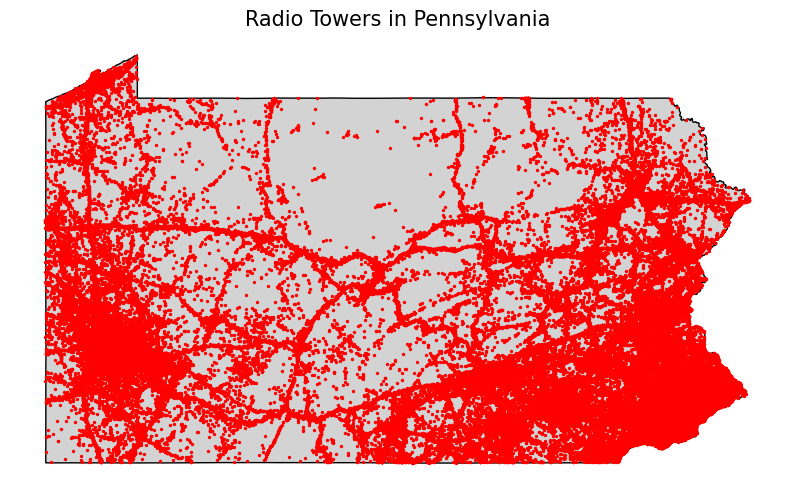

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file containing radio points
radiopoints = pd.read_csv('./Data/US_RadioPoints_PY.csv')

# Load the spatial dataset for all US states using geopandas
pashp = gpd.read_file("./Data/PASHP_PY.shp")

# Create a GeoDataFrame for radio points
radiopoints_gdf = gpd.GeoDataFrame(radiopoints, geometry=gpd.points_from_xy(radiopoints['Longitude'], radiopoints['Latitude']))

# Set the coordinate reference system (CRS) for the GeoDataFrame to match the state shapefile
radiopoints_gdf.crs = pashp.crs

# Overlay radio points within the boundary of PA
points_in_pa = gpd.overlay(radiopoints_gdf, pashp, how='intersection')

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the US states with light grey fill and black borders
pashp.plot(ax=ax, facecolor="lightgrey", edgecolor="black")

# Plot radio points in red
points_in_pa.plot(ax=ax, color="red", markersize=2)

ax.set_title("Radio Towers in Pennsylvania", fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()

# Show the plot
plt.show()

### Scaling Up - Contrasting Rural and Urban Digital & Cellular Connectivity in Brazil

We looked to scale up from Pennsylvania to conduct a comparable analysis and create a unique visualization, depicting the disparities in digital equity and infrastructure between rural and urban areas in Brazil. Brazil’s digital equity and infrastructure landscape shows a significant divide between rural and urban areas, reflecting both progress and disparities. In urban regions, particularly major cities like São Paulo and Rio de Janeiro, there is generally robust digital infrastructure with widespread access to high-speed internet and advanced technologies. Urban residents often benefit from digital literacy programs and a variety of online services, contributing to a more connected and informed population. Conversely, rural areas face challenges related to limited access to reliable internet services and lower digital literacy rates. The vast geographical expanse of Brazil poses logistical challenges in extending digital infrastructure to remote regions, opposing the integration of technology into everyday life for rural communities. Addressing this urban-rural digital gap remains a crucial task for Brazil to ensure that the benefits of the digital age are accessible to all citizens.

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas.tools import sjoin
import requests

In [5]:
# Load Data From CSV

celltowers = pd.read_csv("./Data/724.csv.gz")

In [6]:
# Rename Columns

celltowers = celltowers.rename(columns={"-51.195946": "lon", "-30.073872": "lat"})
geometry = [Point(lon, lat) for lon, lat in zip(celltowers['lon'], celltowers['lat'])]
crs = {'init': 'epsg:4326'}
celltowers = gpd.GeoDataFrame(celltowers, crs=crs, geometry=geometry)

In [7]:
# Load Country Data For Brazil

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brazil = world[world['name'] == 'Brazil']

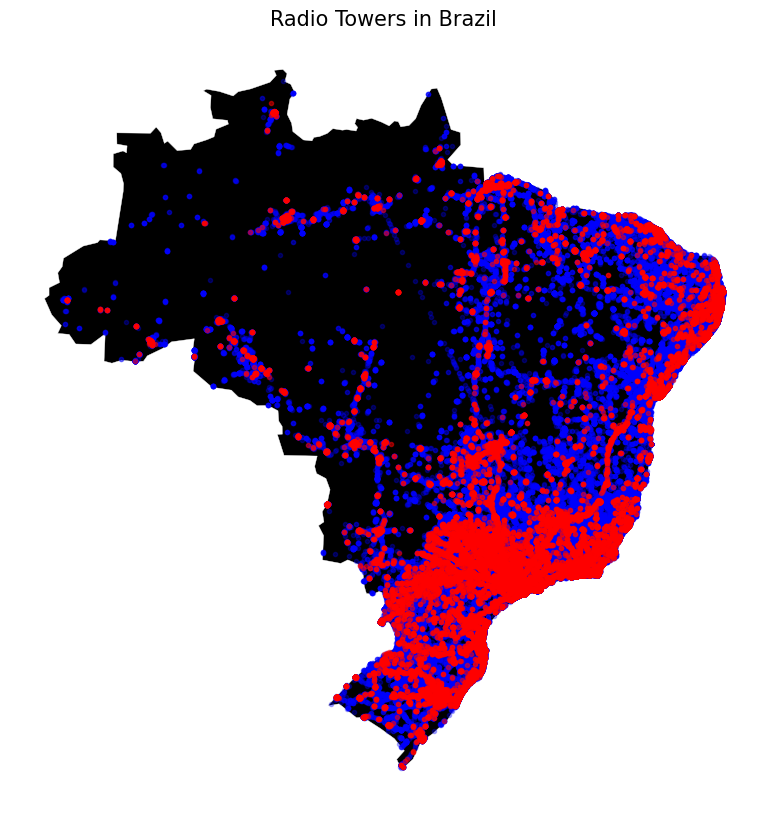

In [11]:
# Filter cell towers for UMTS and LTE using the "GSM" column
UMTS = celltowers[celltowers['GSM'] == 'UMTS'].copy()
UMTS = sjoin(UMTS, brazil, how='inner')

LTE = celltowers[celltowers['GSM'] == 'LTE'].copy()
LTE = sjoin(LTE, brazil, how='inner')

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
brazil.plot(ax=ax, color='black', edgecolor='white', linewidth=0.3)
UMTS.plot(ax=ax, marker='.', color='#0000ff', alpha=0.3)
LTE.plot(ax=ax, marker='.', color='#ff0000', alpha=0.5)
ax.set_title("Radio Towers in Brazil", fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()

## Sources
- [OpenCellID](https://opencellid.com)
- [Center For Rural Pennsylvania](https://www.rural.pa.gov/home)
- [Pennsylvania Spatial Data Access](https://www.pasda.psu.edu/uci/DataSummary.aspx?dataset=24)
- [United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html)